Accuracy (Batch GD): (array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0]))
Classification Report (Batch GD):
               precision    recall  f1-score   support

           0       0.38      1.00      0.55        43
           1       0.00      0.00      0.00        71

    acc

<ipython-input-3-9f877e41b58f>:33: RuntimeWarning: overflow encountered in exp
  y_pred_test_batch = 1 / (1 + np.exp(-z_test_batch))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control t

ValueError: ignored

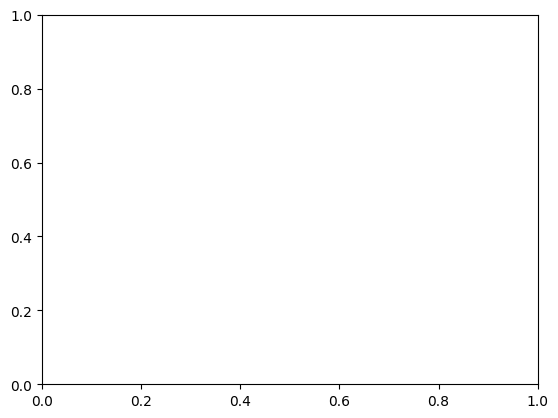

In [3]:
#Basic Gradient Descent

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
def binary_cross_entropy(y_true, y_pred):
 epsilon = 1e-15
 y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
 return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()
def batch_gradient_descent(X, y, learning_rate, num_epochs):
 m, n = X.shape
 w = np.zeros(n) # Initialize weights to zeros
 loss_history = []
 for epoch in range(num_epochs):
  z = np.dot(X, w)
 y_pred = 1 / (1 + np.exp(-z))
 gradient = np.dot(X.T, y_pred - y) / m
 w -= learning_rate * gradient
 epoch_loss = binary_cross_entropy(y, y_pred)
 loss_history.append(epoch_loss)
 return w, loss_history
learning_rate_batch = 0.01
num_epochs = 100
trained_weights_batch, loss_history_batch = batch_gradient_descent(X_train, y_train,
learning_rate_batch, num_epochs)
z_test_batch = np.dot(X_test, trained_weights_batch)
y_pred_test_batch = 1 / (1 + np.exp(-z_test_batch))
y_pred_test_batch = (y_pred_test_batch > 0.5).astype(int)
accuracy_batch = accuracy_score(y_test, y_pred_test_batch)
report_batch = classification_report(y_test, y_pred_test_batch)
print("Accuracy (Batch GD):", accuracy_batch)
print("Classification Report (Batch GD):\n", report_batch)
plt.plot(range(num_epochs), loss_history_batch, label="Batch GD")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Convergence (Batch GD)")
plt.show()


Accuracy (SGD): 0.6228070175438597


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: ignored

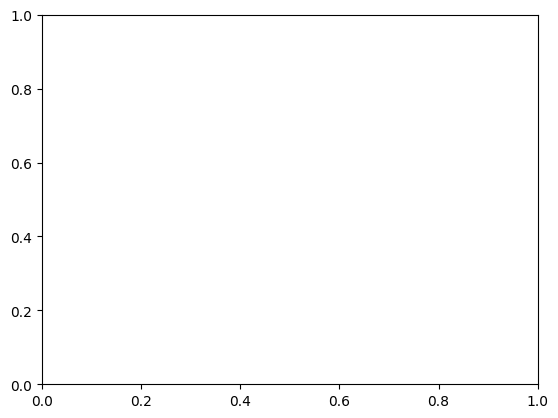

In [4]:
#Stockhastic Gradient Descent
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
def binary_cross_entropy(y_true, y_pred):
 epsilon = 1e-15
 y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
 return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()
def sgd_logistic_regression(X, y, learning_rate, num_epochs):
 m, n = X.shape
 w = np.zeros(n) # Initialize weights to zeros
 loss_history = []
 for epoch in range(num_epochs):
  total_loss = 0

 permutation = np.random.permutation(m)
 X_shuffled = X[permutation]
 y_shuffled = y[permutation]
 for i in range(m):
  xi = X_shuffled[i]
  yi = y_shuffled[i]
  z = np.dot(xi, w)

  y_pred = 1 / (1 + np.exp(-z))
  gradient = xi * (y_pred - yi)
  w -= learning_rate * gradient
  sample_loss = binary_cross_entropy(yi, y_pred)
  total_loss += sample_loss
  average_loss = total_loss / m
  loss_history.append(average_loss)
  return w, loss_history
learning_rate_sgd = 0.01
num_epochs = 100
trained_weights_sgd, loss_history_sgd = sgd_logistic_regression(X_train, y_train,
learning_rate_sgd, num_epochs)
z_test_sgd = np.dot(X_test, trained_weights_sgd)
y_pred_test_sgd = 1 / (1 + np.exp(-z_test_sgd))
y_pred_test_sgd = (y_pred_test_sgd > 0.5).astype(int)
accuracy_sgd = accuracy_score(y_test, y_pred_test_sgd)
report_sgd = classification_report(y_test, y_pred_test_sgd)
print("Accuracy (SGD):", accuracy_sgd)

plt.plot(range(num_epochs), loss_history_sgd, label="SGD")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Convergence (SGD)")
plt.show()